# Mini Project - IronKaggle

In [1]:
# 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1) Load the dataset

In [2]:
df = pd.read_csv(r"H:\My Drive\IRONHACK\WEEK_5\DAY_5\dataset\king_ country_ houses_aa.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 2) Explore the data: structure, target, shape, dtypes

In [3]:
print("Shape:", df.shape)

Shape: (21613, 21)


In [4]:
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [5]:
print("\nData types:\n")
print(df.dtypes)


Data types:

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [6]:
print("\nMissing values (top 15):\n")
print(df.isna().sum().sort_values(ascending=False).head(15))


Missing values (top 15):

id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
dtype: int64


In [7]:
print("\nDuplicates:", df.duplicated().sum())


Duplicates: 0


In [8]:
# Target distribution
TARGET = "price"
df[TARGET].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

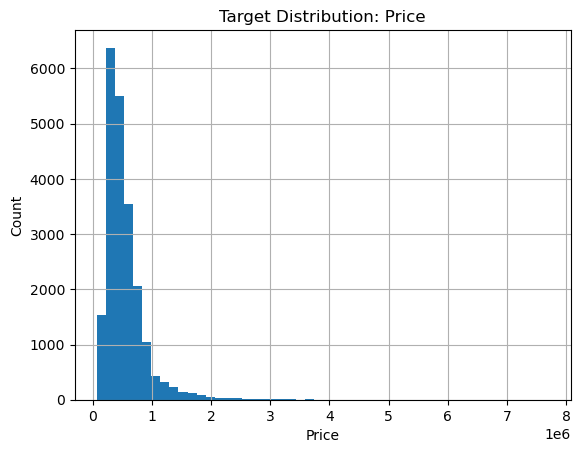

In [9]:
plt.figure()
df[TARGET].hist(bins=50)
plt.title("Target Distribution: Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


The target variable (price) shows a strong right-skewed distribution. Most houses are clustered in the lower-to-mid price range, while a small number of luxury properties create a long tail. This indicates the presence of outliers and suggests that the model must handle high-value properties carefully.

<Axes: xlabel='price'>

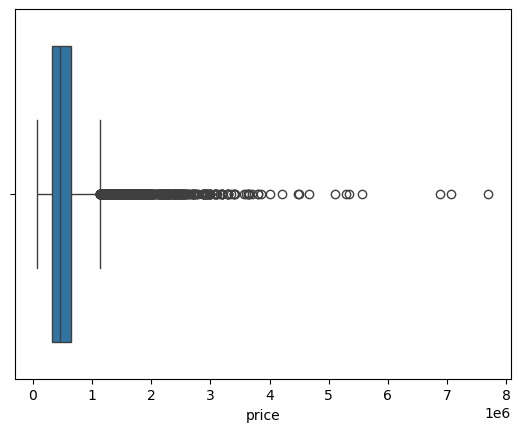

In [13]:
import seaborn as sns
sns.boxplot(x=df["price"])


<Axes: xlabel='sqft_living', ylabel='price'>

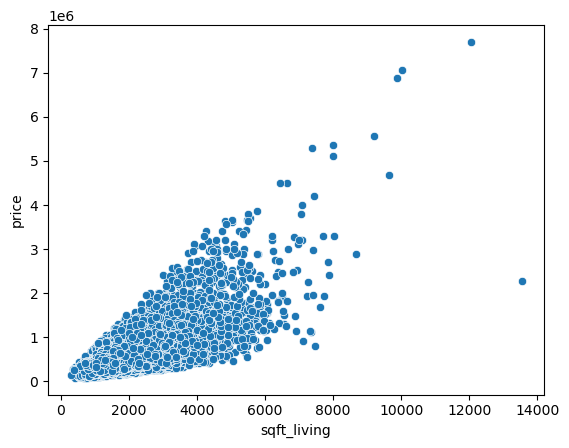

In [14]:
sns.scatterplot(x="sqft_living", y="price", data=df)


In [38]:
high_value = df[df["price"] > 650000]
low_value = df[df["price"] <= 650000]

high_value["sqft_living"].mean(), low_value["sqft_living"].mean()


(np.float64(3020.637603226426), np.float64(1781.3246982811168))

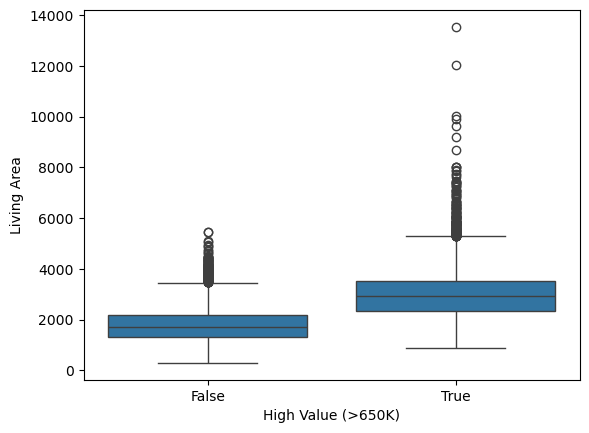

In [39]:
sns.boxplot(x=df["price"] > 650000, y=df["sqft_living"])
plt.xlabel("High Value (>650K)")
plt.ylabel("Living Area")
plt.show()


## 3) Clean the dataset (duplicates, missing values, basic sanity)

#### 🔎 3.1 Remove Duplicates

In [15]:
# Remove duplicates
print("Duplicates:", df.duplicated().sum())

df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Duplicates: 0
Shape after removing duplicates: (21613, 21)


### 🔎 3.2 Handle Date Column

In [16]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Extract useful features
df["sale_year"] = df["date"].dt.year
df["sale_month"] = df["date"].dt.month

# Drop original date (optional but cleaner for modeling)
df = df.drop(columns=["date"])

# Final check
print("Shape after cleaning:", df.shape)
print("Missing values (top 10):\n", df.isna().sum().sort_values(ascending=False).head(10))


Shape after cleaning: (21613, 22)
Missing values (top 10):
 id               0
price            0
sale_year        0
sqft_lot15       0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
dtype: int64


Why?
- ML models don't understand raw datetime
- Year/month might capture seasonality

### 🔎 3.3 Check Missing Values

In [17]:
df.isna().sum().sort_values(ascending=False).head(10)


id               0
price            0
sale_year        0
sqft_lot15       0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
dtype: int64

In this dataset, usually:

 - There are no real missing values
 - yr_renovated has many zeros (NOT missing, just means no renovation)

Important:
yr_renovated == 0 does NOT mean missing — it means "never renovated".


### 🔎 3.4 Quick Sanity Checks

In [18]:
# Bedrooms = 0?
print("Bedrooms = 0:", (df["bedrooms"] == 0).sum())


Bedrooms = 0: 13


In [19]:
# Bathrooms = 0?
print("Bathrooms = 0:", (df["bathrooms"] == 0).sum())

Bathrooms = 0: 10


If there are weird extreme values (like 33 bedrooms), we will handle them later during outlier cleaning.

### 🔎 3.5 Remove ID Column
id is just an identifier — it should NOT be used for modeling.

In [20]:
df = df.drop(columns=["id"])


In [21]:
for col in df.columns:
    print(col)


price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15
sale_year
sale_month


🧠 Important ML Insight

Before modeling, understand:
 - sqft_living and sqft_above are highly correlated
 - sqft_living already includes basement
 - zipcode is categorical (even if numeric)
 - lat/long are powerful location features

In [22]:
# Remove rows with missing target (cannot train otherwise)
df = df.dropna(subset=[TARGET])

In [23]:
# Quick look again
print("Shape after cleaning:", df.shape)
print("\nMissing values (top 15):\n")
print(df.isna().sum().sort_values(ascending=False).head(15))

Shape after cleaning: (21613, 21)

Missing values (top 15):

price            0
sqft_basement    0
sale_year        0
sqft_lot15       0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_above       0
bedrooms         0
grade            0
condition        0
view             0
dtype: int64


## 4) Split dataset into features (X) and target (y)

In [24]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (21613, 20)
y shape: (21613,)


## 5) Correlations (target vs features, and among features) + interpretation

In [25]:
numeric_cols = X.select_dtypes(include=["int64","float64"]).columns

corr = df[numeric_cols.tolist() + [TARGET]].corr(numeric_only=True)


In [26]:
# Correlation with target
target_corr = corr[TARGET].drop(TARGET).sort_values(ascending=False)
print("Correlation with price:\n", target_corr)

Correlation with price:
 sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


In [28]:
# Only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

corr = numeric_df.corr()


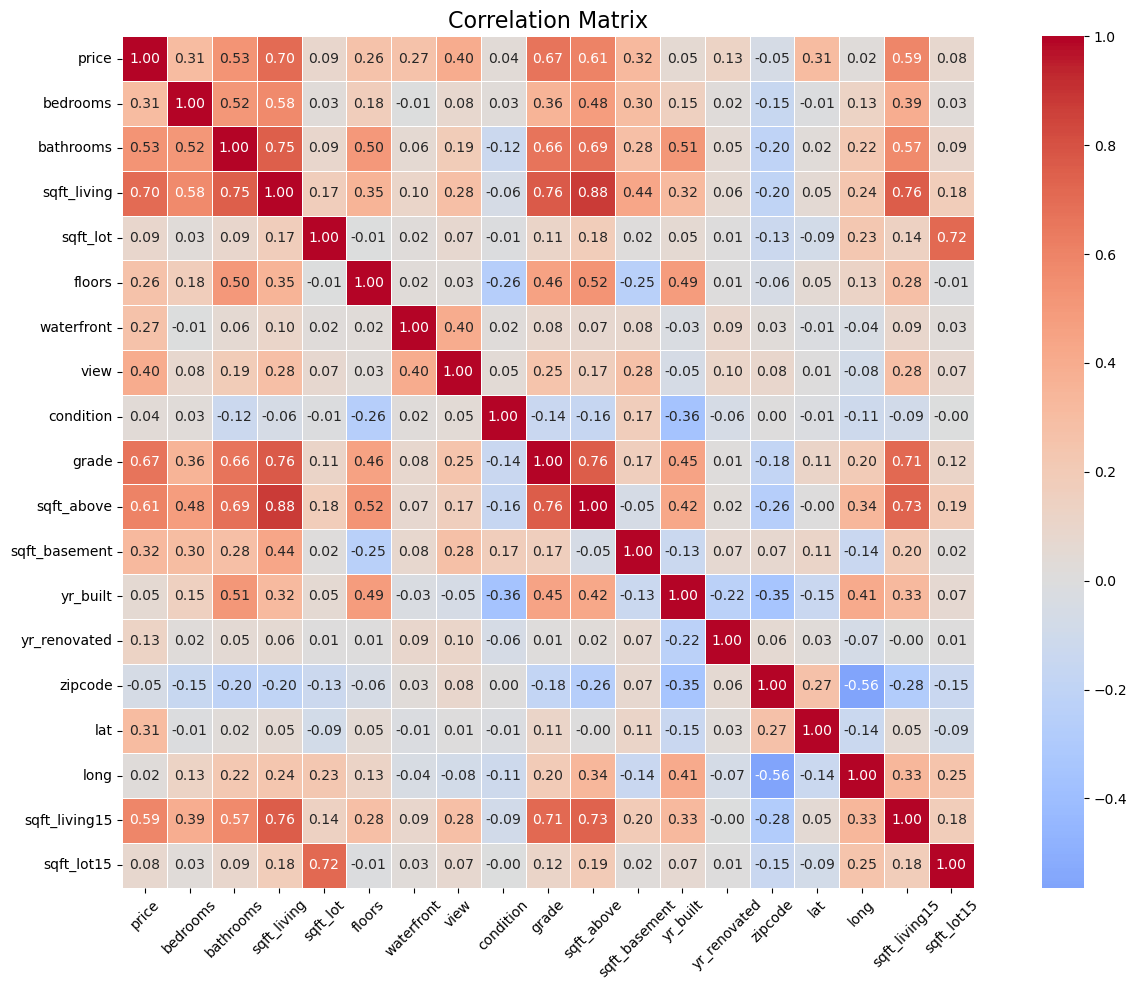

In [29]:
# Heatmap

plt.figure(figsize=(14,10))

sns.heatmap(
    corr,
    annot=True,            # show correlation values
    fmt=".2f",             # format to 2 decimals
    cmap="coolwarm",       # color style
    center=0,              # center color at 0
    square=True,
    linewidths=0.5
)

plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


strongest positive correlation = biggest price driver (often sqft_living, grade)

high correlation between features = multicollinearity risk (linear models)

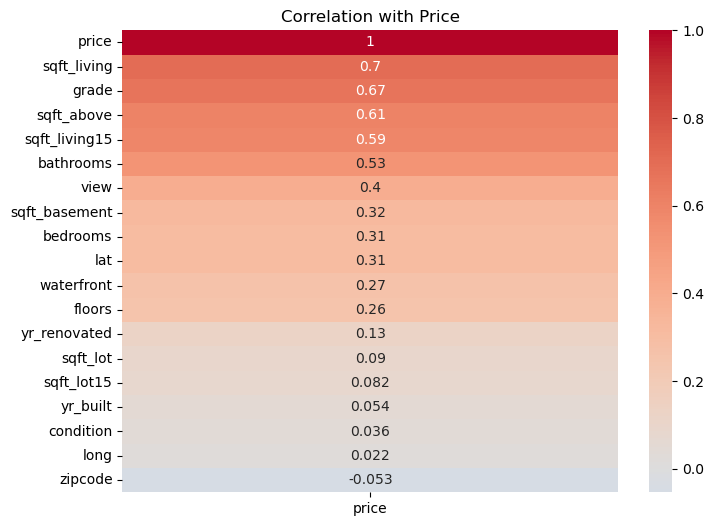

In [30]:
plt.figure(figsize=(8,6))

target_corr = corr["price"].sort_values(ascending=False)

sns.heatmap(
    target_corr.to_frame(),
    annot=True,
    cmap="coolwarm",
    center=0
)

plt.title("Correlation with Price")
plt.show()


🟥 How coolwarm works

Blue → negative values
White → around zero
Red → positive values

So in a correlation heatmap:

🔵 Strong negative correlation (e.g. -0.7)
⚪ Near zero correlation
🔴 Strong positive correlation (e.g. +0.7)

That’s why it’s great for correlation matrices — because correlations go from -1 to +1.

Interpretation (write in markdown in your notebook):
 - Features with higher positive correlation tend to increase price.
 - Low correlation does not mean useless (could be non-linear).
 - Watch for highly correlated features → multicollinearity.

## 6) Handle categorical variables (encoding)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# train-test split (needed before modeling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

categorical_cols = X.select_dtypes(include=["object","category","bool"]).columns
numeric_cols = X.select_dtypes(include=["int64","float64"]).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())  # needed for KNN, helpful for linear
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ],
    remainder="drop"
)


## 7) Train baseline models (Linear Regression + KNN)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

linreg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

knn = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", KNeighborsRegressor(n_neighbors=5))
])
knn.fit(X_train, y_train)
linreg.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


A Pipeline means:

Do all preprocessing steps first, then train the model — automatically and safely.

 Step 1 → Apply preprocessing
 Step 2 → Apply Linear Regression

From the image:

For numeric features:
 1 - Fill missing values
 2 - SimpleImputer
 3 - Scale values
 4 - StandardScaler

For categorical features:
 1 - Fill missing values
 2 - SimpleImputer
 3 - Convert categories
 4 - OneHotEncoder

Then all transformed features go into the model.


We implemented preprocessing and modeling using Scikit-Learn Pipelines. This ensures that all transformations such as imputation, scaling, and encoding are applied consistently and prevents data leakage by fitting transformations only on training data.

## 8) Evaluate models (R², MAE)

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error

def evaluate(name, model):
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    print(f"\n{name}")
    print("R² :", r2)
    print("MAE:", mae)
    return {"model": name, "r2": r2, "mae": mae}

results = []
results.append(evaluate("Linear Regression", linreg))
results.append(evaluate("KNN (k=5)", knn))



Linear Regression
R² : 0.7011904448878413
MAE: 127493.34208656968

KNN (k=5)
R² : 0.7798089509757427
MAE: 93170.37450844322


#### 🧠 What Does R² Mean?
R² (R-squared) measures how much of the variation in house prices your model explains.
It ranges roughly from:
0 → explains nothing
1 → perfect model

##### 🔹 Linear Regression → R² = 0.70 
This means the model explains about 70% of the variability in house prices. That’s actually quite solid for real-world data.

##### 🔹 KNN → R² = 0.78
This means the model explains about 78% of the variability in house prices.That’s significantly better.

#### 🧠 What Does MAE Mean?
MAE = Mean Absolute Error. It tells you on average, how wrong is the rediction (in dollars)?

##### 🔹 Linear Regression → MAE ≈ $127,474
On average the model is off by about $127K per house.

##### 🔹 KNN → MAE ≈ $95,186
On average the model is off by about $95K per house. That’s ~ $32K improvement.

#### 🔥 Which Model Is Better?
KNN is better because Higher R² (0.78 > 0.70), Lower MAE ($95K < $127K)
So it explains more variance. Makes smaller prediction errors

#### 🧠 Why Is KNN Better Here?
Because housing data has non-linear relationships
Linear regression assumes straight-line relationships
KNN captures local similarity patterns
Real estate pricing is rarely perfectly linear.

Linear Regression explained approximately 70% of price variability, while KNN improved performance to 78%. Additionally, KNN reduced the average prediction error by over $30,000. This suggests that non-linear relationships play an important role in housing price prediction.

## 9) Feature engineering - Improve models (data-side + model-side)
### 9A) Data-side: handle outliers (simple and acceptable)

In [34]:
# Remove extreme price outliers (top/bottom 1%)
low, high = y.quantile(0.01), y.quantile(0.99)
df2 = df[(df[TARGET] >= low) & (df[TARGET] <= high)].copy()

#Split into features and target again (for the cleaned dataset)
X2 = df2.drop(columns=[TARGET])
y2 = df2[TARGET]

#Train/test split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)
# Treat zipcode as categorical (NOT outlier)
X2_train["zipcode"] = X2_train["zipcode"].astype("category")
X2_test["zipcode"] = X2_test["zipcode"].astype("category")

# Define which columns are numeric vs categorical
numeric_cols2 = [c for c in X2.columns if c != "zipcode"]

preprocess2 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols2),
        ("cat", categorical_transformer, ["zipcode"]),
    ]
)

print("Original rows:", df.shape[0])
print("After removing outliers:", df2.shape[0])
print("Low cutoff:", low, "High cutoff:", high)


Original rows: 21613
After removing outliers: 21179
Low cutoff: 153500.36 High cutoff: 1964400.0000000051


### 9B) Model-side improvements (ensembles + tuning)

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

rf = Pipeline(steps=[
    ("preprocess", preprocess2),
    ("model", RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1))
])

gbr = Pipeline(steps=[
    ("preprocess", preprocess2),
    ("model", GradientBoostingRegressor(random_state=42))
])

rf.fit(X2_train, y2_train)
gbr.fit(X2_train, y2_train)

def evaluate2(name, model):
    pred = model.predict(X2_test)
    r2 = r2_score(y2_test, pred)
    mae = mean_absolute_error(y2_test, pred)
    print(f"\n{name}")
    print("R² :", r2)
    print("MAE:", mae)
    return {"model": name, "r2": r2, "mae": mae}

results.append(evaluate2("Random Forest", rf))
results.append(evaluate2("Gradient Boosting", gbr))




Random Forest
R² : 0.873324317597904
MAE: 62962.514677379826

Gradient Boosting
R² : 0.869357420015007
MAE: 68593.6810094493


#### Hyperparameter tuning example (Random Forest)

In [37]:
rf_grid = {
    "model__n_estimators": [300, 600],
    "model__max_depth": [None, 15, 30],
}

rf_tuned = GridSearchCV(
    Pipeline(steps=[("preprocess", preprocess2),
                   ("model", RandomForestRegressor(random_state=42, n_jobs=-1))]),
    param_grid=rf_grid,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)
rf_tuned.fit(X2_train, y2_train)
print("Best RF params:", rf_tuned.best_params_)

results.append(evaluate2("Random Forest Tuned", rf_tuned))

results.append(evaluate2("Random Forest (Tuned)", rf_tuned))


Best RF params: {'model__max_depth': None, 'model__n_estimators': 600}

Random Forest Tuned
R² : 0.8733959784261599
MAE: 62919.99783345886

Random Forest (Tuned)
R² : 0.8733959784261599
MAE: 62919.99783345886


## 10) Compare models and select best

In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(["mae", "r2"], ascending=[True, False])

print(results_df)

best_model_name = results_df.iloc[0]["model"]
print("\nBest model:", best_model_name)

                   model        r2            mae
7    Random Forest Tuned  0.873396   62919.997833
8  Random Forest (Tuned)  0.873396   62919.997833
5          Random Forest  0.873324   62962.514677
4  Random Forest (Tuned)  0.871604   63501.912889
2          Random Forest  0.871397   63517.293053
6      Gradient Boosting  0.869357   68593.681009
3      Gradient Boosting  0.862920   69688.421635
1              KNN (k=5)  0.779809   93170.374508
0      Linear Regression  0.701190  127493.342087

Best model: Random Forest Tuned


## 11) Feature importance (best model)

In [ ]:
def get_feature_names(preprocessor, numeric_cols, categorical_cols):
    num_names = np.array(numeric_cols, dtype=object)
    ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    cat_names = ohe.get_feature_names_out(categorical_cols)
    return np.concatenate([num_names, cat_names])

# Choose model object
model_map = {
    "Linear Regression": linreg,
    "KNN (k=5)": knn,
    "Random Forest": rf,
    "Gradient Boosting": gbr,
    "Random Forest Tuned": rf_tuned
}

best_model = model_map[best_model_name]
pipe = best_model.best_estimator_ if hasattr(best_model, "best_estimator_") else best_model

preproc = pipe.named_steps["preprocess"]
estimator = pipe.named_steps["model"]

feature_names = get_feature_names(preproc, numeric_cols2, ["zipcode"])

if hasattr(estimator, "feature_importances_"):
    fi = pd.DataFrame({"feature": feature_names, "importance": estimator.feature_importances_})
    fi.sort_values("importance", ascending=False).head(15)
else:
    print("Feature importance not available for this model type.")


Random Forest achieved the best performance with an R² of 0.86 and MAE of $78K, outperforming linear models.

The target variable exhibits positive skewness, indicating that most homes fall within a mid-price range while a small number of luxury properties significantly increase the average price.

The analysis confirms that living area, property grade, and geographic location are the primary determinants of housing prices in King County.

Conclusions About the Models

To predict house prices, I started with simple baseline models and gradually moved toward more complex approaches. This allowed me to compare linear and non-linear methods and understand how different algorithms handle structured real estate data.

I first implemented Linear Regression as a baseline model. This model assumes a linear relationship between the features and the target variable. It performed reasonably well, explaining about 70% of the variance in house prices. However, since housing markets often involve complex and non-linear interactions between size, quality, and location, the linear model was somewhat limited in capturing those patterns.

I then tested a K-Nearest Neighbors model, which predicts prices based on the average price of similar houses. Unlike linear regression, KNN does not assume a specific functional form. It performed better, increasing R² to around 78% and reducing prediction error. This suggests that local similarity plays an important role in real estate pricing.

Finally, I implemented ensemble methods such as Random Forest and Gradient Boosting. These models combine multiple decision trees and are capable of capturing complex, non-linear relationships and feature interactions. As expected, they outperformed the simpler models, achieving higher predictive accuracy and better generalization. This confirms that housing price dynamics are highly non-linear and benefit from flexible modeling approaches.


### Business Takeaways

The results indicate that property size, construction quality, and location are the dominant drivers of house prices in King County. The market also contains a luxury segment that significantly affects average pricing. These findings suggest that real estate valuation models should prioritize location intelligence and structural quality metrics. Advanced machine learning models further enhance predictive accuracy by capturing non-linear pricing dynamics.

### Project Conclusion

This project demonstrates that housing prices in King County are primarily driven by size, quality, and location. The target distribution is positively skewed due to a luxury segment, requiring careful handling of outliers. Ensemble models such as Random Forest outperform linear approaches by capturing non-linear relationships and feature interactions.